In [2]:
!pip install yfinance >> opt/dev/null
import pandas as pd
import scipy
from sklearn.linear_model import LinearRegression, LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
import scipy.optimize as optimize
import statsmodels as sm
import yfinance as yf
import random

/bin/bash: opt/dev/null: No such file or directory


Get Financial Data

In [ ]:
!wget -nc https://www.lazyprogrammer.me/course_files/sp500sub.csv

--2021-12-29 20:41:22--  https://www.lazyprogrammer.me/course_files/sp500sub.csv
Resolving www.lazyprogrammer.me (www.lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to www.lazyprogrammer.me (www.lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://lazyprogrammer.me/course_files/sp500sub.csv [following]
--2021-12-29 20:41:23--  https://lazyprogrammer.me/course_files/sp500sub.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25473876 (24M) [text/csv]
Saving to: ‘sp500sub.csv’

sp500sub.csv        100%[===================>]  24.29M  4.01MB/s    in 6.5s    

2021-12-29 20:41:30 (3.72 MB/s) - ‘sp500sub.csv’ saved [25473876/25473876]



In [ ]:
df = pd.read_csv("/content/sp500sub.csv", index_col='Date', parse_dates=True)

In [ ]:
df['Name'].unique()

array(['INCY', 'GILD', 'DXC', 'AFL', 'XYL', 'ARE', 'AMD', 'WYNN', 'IBM',
       'ATVI', 'AES', 'GPC', 'PRU', 'HST', 'WMB', 'GOOG', 'SRE', 'HSIC',
       'UNP', 'UPS', 'K', 'LYB', 'MDT', 'COF', 'HAS', 'CSX', 'GT', 'SYF',
       'EBAY', 'KSS', 'AJG', 'JWN', 'SBUX', 'IT', 'PH', 'DVN', 'MMM',
       'SPG', 'AKAM', 'IP', 'CPB', 'KMI', 'AAPL', 'NEM', 'KMX', 'TSCO',
       'SYY', 'VNO', 'NWS', 'NBL', 'ACN', 'APH', 'PDCO', 'WLTW', 'FIS',
       'URI', 'CBOE', 'FISV', 'BA', 'UAA', 'CVS', 'WU', 'SLB', 'AIV',
       'VLO', 'MU', 'CAH', 'AZO', 'CCI', 'ZTS', 'MCO', 'ALLE', 'RHI',
       'UAL', 'IR', 'CB', 'VMC', 'GD', 'AAP', 'NEE', 'ABT', 'WFC', 'DIS',
       'SNA', 'MAR', 'JPM', 'CLX', 'KIM', 'SCG', 'HBI', 'ABBV', 'RSG',
       'ETR', 'ADBE', 'COO', 'HLT', 'INTU', 'SLG', 'GWW', 'COG', 'CBS',
       'FB', 'CMS', 'MDLZ'], dtype=object)

In [ ]:
google = df[df['Name']=="GOOG"]

In [ ]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000.0,GOOG
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900.0,GOOG
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100.0,GOOG
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600.0,GOOG
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900.0,GOOG


Calculating Returns

In [ ]:
google['Return_GOOG'] = google['Adj Close'].pct_change(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,Name,Return_GOOG
Date,,,,,,,,
2010-01-04,312.304413,313.579620,310.954468,312.204773,312.204773,3927000.0,GOOG,NaN
2010-01-05,312.418976,312.747742,309.609497,310.829926,310.829926,6031900.0,GOOG,-0.004404
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987100.0,GOOG,-0.025209
2010-01-07,303.562164,303.861053,295.218445,295.940735,295.940735,12876600.0,GOOG,-0.023280
2010-01-08,294.894653,300.498657,293.455048,299.885956,299.885956,9483900.0,GOOG,0.013331


In [ ]:
apple = df[df['Name']=="AAPL"]
apple['Return_apple'] = apple['Close'].pct_change(1)
apple.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Open,High,Low,Close,Adj Close,Volume,Name,Return_apple
Date,,,,,,,,
2010-01-04,30.490000,30.642857,30.340000,30.572857,26.466835,123432400.0,AAPL,NaN
2010-01-05,30.657143,30.798571,30.464285,30.625713,26.512596,150476200.0,AAPL,0.001729
2010-01-06,30.625713,30.747143,30.107143,30.138571,26.090879,138040000.0,AAPL,-0.015906
2010-01-07,30.250000,30.285715,29.864286,30.082857,26.042646,119282800.0,AAPL,-0.001849
2010-01-08,30.042856,30.285715,29.865715,30.282858,26.215786,111902700.0,AAPL,0.006648


Calculating Alpha & Beta of Google compared to the S&P500 Market

Alpha quantifies how much better google performs than the S&P 500

Beta is the trend that google follows with the S&P 500

In [ ]:
joined = google[['Return_GOOG']].join(apple['Return_apple'])

In [ ]:
joined.iloc[200:250]

,Return_GOOG,Return_apple
Date,,
2010-10-19,-0.015995,-0.026761
2010-10-20,0.000247,0.003360
2010-10-21,0.006596,-0.003252
2010-10-22,0.000882,-0.006623
2010-10-25,0.006481,0.004456
2010-10-26,0.003406,-0.002558
2010-10-27,-0.003443,-0.000714
2010-10-28,0.003423,-0.008414
2010-10-29,-0.007889,-0.013956


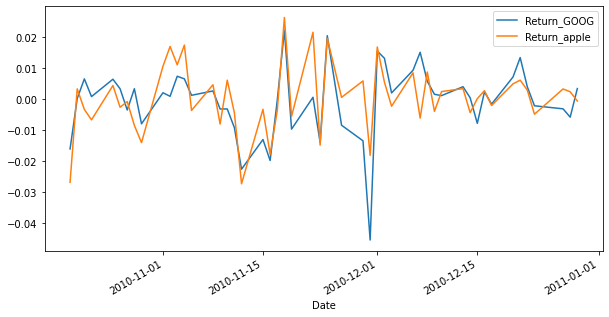

In [ ]:
joined.iloc[200:250].plot(figsize=(10,5))

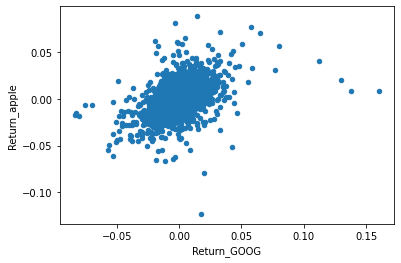

In [ ]:
joined.plot.scatter('Return_GOOG', 'Return_apple')

In [ ]:
joined.dropna(inplace=True)

In [ ]:
X = joined[['Return_GOOG']].to_numpy()
y = joined[['Return_apple']].to_numpy()

In [ ]:
X.shape, y.shape

((2262, 1), (2262, 1))

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
print(f"Alpha: {model.intercept_}")
print(f"Beta: {model.coef_}")

Alpha: [0.00054357]
Beta: [[0.47642484]]


Modelling a T Dristribution to simulate prices

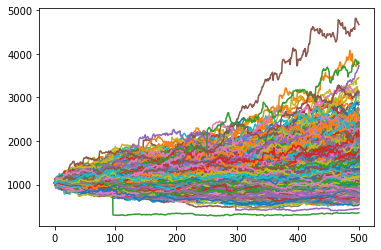

In [ ]:
og = []
for _ in range(1000):
  df, loc, scale = t.fit(google['Return_GOOG'].dropna())
  prices = [google['Close'][-1]]
  for _ in range(0, 500):
    r = t.rvs(df, loc, scale)
    p = prices[-1] * (1+r)
    prices.append(p)
  og.append(prices)

for o in og:
  plt.plot(o)

og = np.array(og)


In [ ]:
print(og.mean())
print(og.std(ddof=1))
print(og.max())
print(og.min())

# 95% confidence interval

low = og.mean() - 1.96 * og.std(ddof=1) / np.sqrt(len(og))
high = og.mean() + 1.96 * og.std(ddof=1) / np.sqrt(len(og))

print(low)
print(high)

1233.5501545557422
336.4559127337387
4819.925765545151
279.9820852847663
1212.6964010329407
1254.4039080785437


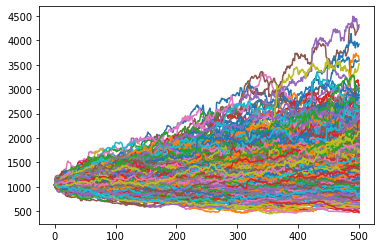

In [ ]:
og = []
for _ in range(1000):
  returns = google['Return_GOOG'].dropna()
  prices = [google['Close'][-1]]
  for _ in range(0, 500):
    r = np.random.choice(returns)
    p = prices[-1] * (1+r)
    prices.append(p)
  og.append(prices)

for o in og:
  plt.plot(o)

og = np.array(og)

In [ ]:
print(og.mean())
print(og.std(ddof=1))
print(og.max())
print(og.min())

# 95% confidence interval

low = og.mean() - 1.96 * og.std(ddof=1) / np.sqrt(len(og))
high = og.mean() + 1.96 * og.std(ddof=1) / np.sqrt(len(og))

print(low)
print(high)

1220.1253808213924
339.84690371223473
4491.341377690797
444.76963521384585
1199.061451500255
1241.1893101425296


In [ ]:
print(google['Close'][-1])
google.tail()

1037.0799560546877


,Open,High,Low,Close,Adj Close,Volume,Name,Return_GOOG
Date,,,,,,,,
2018-12-21,1015.299988,1024.020020,973.690002,979.539978,979.539978,4596000.0,GOOG,-0.029592
2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300.0,GOOG,-0.003389
2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300.0,GOOG,0.064780
2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800.0,GOOG,0.004252
2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800.0,GOOG,-0.006514


Plotting the T distribution

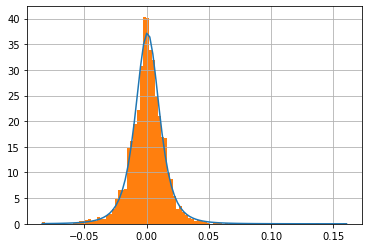

In [ ]:
x_space = np.linspace(google['Return_GOOG'].min(), google['Return_GOOG'].max(), 100)
df, loc, scale = t.fit(google['Return_GOOG'].dropna())
y_list = t.pdf(x_space, df, loc, scale)

plt.plot(x_space, y_list)
google['Return_GOOG'].hist(bins=100, density=True)

95 % confidence Interval -- It will tell you the range taken up by the mean value

In [ ]:
google_return = joined['Return_GOOG'].dropna().to_numpy()
google_return_mean = google_return.mean()
google_return_std = google_return.std(ddof=1)

low = google_return_mean - 1.96 * google_return_std / np.sqrt(len(google_return))
high = google_return_mean + 1.96 * google_return_std / np.sqrt(len(google_return))

print(google_return_mean, google_return_std, low, high)

0.0006488877545276502 0.01542914921084502 1.3042037828647443e-05 0.001284733471226653


[]

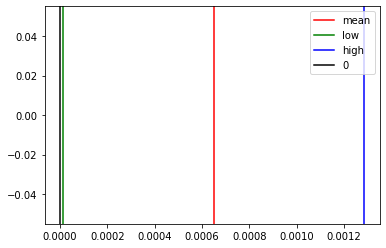

In [ ]:
plt.axvline(google_return_mean, label='mean', color='red')
plt.axvline(low, label='low', color='green')
plt.axvline(high, label='high', color='blue')
plt.axvline(0, label='0', color='black')
plt.legend()
plt.plot()

Efficient Market Hypothesis

Random Walk Hypothesis

Time Series - Your ARIMA our FB prophet Model won't beat the naive forecast (rmse of last datapoint)

Portfolio Optimization - Capital Asset Pricing Model

1. Return on an asset

2. Model returns / prices as time series (prediction is very hard)

3. Accept defeat portfolio's are a better solution

Risk - how diversification mitigates risk

Mean (Expected return and variance)

Mean - variance optimization

Linear and Quadratic programming

S&P500 - Proxy for the market

Weights - what percentage of wealth has been invested into each stock. The sum of the weights must add upto 1.

Risk

Fact: Stock returns are random

Risk - Standard deviation

In [3]:
num_of_stocks = 300

def calculate_return(stock):
  returns = np.log(stock/stock.shift(1))
  return returns

def calculate_portfolio_return(weights, returns):
  return np.dot(weights.T, returns.mean()*252)

def calculate_portfolio_variance(weights, returns):
  return np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

def initialize_weights():
  weights = np.random.random(num_of_stocks)
  weights /= np.sum(weights)
  return weights

def generate_portfolios(weights, returns):
  port_returns = []
  port_variances = []

  for i in range(1000):
    weights = np.random.random(num_of_stocks)
    weights /= np.sum(weights)
    port_returns.append(np.sum(returns.mean()*weights)*252)
    port_variances.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov() \
                                                           * 252, weights))))
  
  port_returns = np.array(port_returns)
  port_variances = np.array(port_variances)

  return port_returns, port_variances

def calculate_shape_ratio(weights, returns):
  r = calculate_portfolio_return(weights, returns)
  v = calculate_portfolio_variance(weights, returns)
  return r/v

def download_data(stocks, period, intercept):
  data_frame = yf.download(stocks, period=period, intercept=intercept, \
                           group_by='ticker')
    
  data = pd.DataFrame()
  
  for title in stocks:
    if len(stocks) == 1:
      data[title] = data_frame['Adj Close']
    else:
      data[title] = data_frame[title]['Adj Close']
  
  return data


In [4]:
def optimize_portfolio(weights, returns):
  constraints=({'type':'eq', 'fun': lambda x: np.sum(x)-1})
               # Choose 0.05 of the first stock
              #  {'type':'eq', 'fun': lambda x: x[0]-0.05})
  bounds = tuple((0, 1) for x in range(num_of_stocks))
  optimum = optimize.minimize(fun=calculate_shape_ratio, x0=weights, \
                              args=returns \
                              , method='SLSQP',bounds=bounds, \
                              constraints=constraints)
  return optimum


def print_results(stock_data, optimum, returns):
  optimum = optimum['x']
  print(optimum)
  for idx, opt in enumerate(optimum):
    if opt.round(3) > 0:
      print(stock_data[idx], opt.round(3))
  
  return_val = calculate_portfolio_return(weights, returns)
  total_risk = calculate_portfolio_variance(weights, returns)
  print(f"Total return: {return_val}")
  print(f"Total risk: {total_risk}")
  print(f"Sharpe ratio {return_val/total_risk}")
  return return_val, total_risk

In [ ]:
with open("/content/stocks.txt", "r") as f:
  stock_data = f.read().splitlines()

stock_data = random.sample(stock_data, 300)

data = download_data(stock_data, "5y", "1d")

weights = initialize_weights()
returns = calculate_return(data)

v = calculate_portfolio_variance(weights, returns)
r = calculate_portfolio_return(weights, returns)

sharpe = calculate_shape_ratio(weights, returns)

ret, risk = generate_portfolios(weights, returns)

plt.scatter(risk, ret, c=ret/risk)

optimum = optimize_portfolio(weights, returns)

ret, risk = print_results(stock_data, optimum, returns)

plt.plot(risk, ret, 'g*',markersize=20.0)

plt.show()


FileNotFoundError: ignored

Simple Moving Average

In [ ]:
data = download_data(["SPY"], "5y", "1d")

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

,SPY
Date,
2017-01-03,206.146194
2017-01-04,207.372620
2017-01-05,207.207870
2017-01-06,207.949219
2017-01-09,207.262787


In [ ]:
data["Log Return"] = np.log(data['SPY']).diff()

In [ ]:
data["Log Return"] = data["Log Return"].shift(-1)

In [ ]:
data.head()

,SPY,Log Return
Date,,
2017-01-03,206.146194,0.005932
2017-01-04,207.372620,-0.000795
2017-01-05,207.207870,0.003571
2017-01-06,207.949219,-0.003306
2017-01-09,207.262787,0.000000


In [ ]:
data["Slow"] = data["SPY"].rolling(10).mean()
data["Fast"] = data["SPY"].rolling(30).mean()

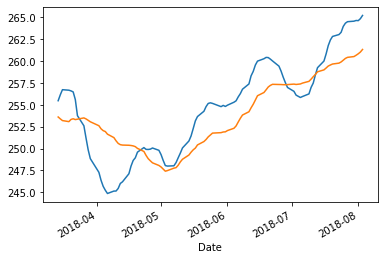

In [ ]:
data["Slow"].iloc[300:400].plot()
data["Fast"].iloc[300:400].plot()

Strategy: Where fast moving average > show moving average, signal is to sell.

In [ ]:
data["Signal"] = np.where(data['Fast'] >= data["Slow"], 1, 0)

In [ ]:
data["Prev Signal"] = data["Signal"].shift(1)

data["Buy"] = (data["Prev Signal"] ==0) &  (data["Signal"] == 1)

data["Sell"] = (data["Prev Signal"] == 1) & (data["Signal"] == 0)


In [ ]:
is_invested = False

def invested(row):
  global is_invested
  if is_invested and row["Sell"]:
    is_invested = False
  
  if not is_invested and row["Buy"]:
    is_invested = True
  
  return is_invested

data['Is Invested'] = data.apply(invested, axis=1)

In [ ]:
data["Algo Return"] = data["Is Invested"] * data["Log Return"]

In [ ]:
data["Algo Return"].sum()

0.4006994375771802

In [ ]:
data["Log Return"].sum()

0.8346449730520993

Based on the calculated returns on top, we can see that the buy and hold strategy outperforms the moving average signal strategy.

In [ ]:
print(f"Algo return risk: {data['Algo Return'].std()}")
print(f"Log return risk: {data['Log Return'].std()}")

Algo return risk: 0.009415009398622847
Log return risk: 0.011944392253012307


Machine Learning Strategy

In [5]:
data_ml = download_data(['AAPL', 'GOOG', "TSLA", "SPY"], "5y", "1d")

[*********************100%***********************]  4 of 4 completed


In [6]:
data_ml.head()

,AAPL,GOOG,TSLA,SPY
Date,,,,
2017-01-03,27.332472,786.140015,43.397999,206.146179
2017-01-04,27.301878,786.900024,45.397999,207.372635
2017-01-05,27.440720,794.020020,45.349998,207.207886
2017-01-06,27.746634,806.150024,45.801998,207.949219
2017-01-09,28.000780,806.650024,46.256001,207.262802


In [7]:
data_ml.tail()

,AAPL,GOOG,TSLA,SPY
Date,,,,
2021-12-27,180.330002,2961.280029,1093.939941,477.260010
2021-12-28,179.289993,2928.959961,1088.469971,476.869995
2021-12-29,179.380005,2930.090088,1086.189941,477.480011
2021-12-30,178.199997,2920.050049,1070.339966,476.160004
2021-12-31,177.570007,2893.590088,1056.780029,474.959991


In [8]:
print(len(data_ml))
data_ml.dropna(axis=0, how='any', inplace=True)
data_ml.dropna(axis=1, how='any', inplace=True)
print(len(data_ml))
print(data_ml.isna().sum().sum())

1259
1259
0


In [9]:
returns = pd.DataFrame()
for name in data_ml.columns:
  returns[name] = np.log(data_ml[name]).diff()

returns['SPY'] = returns['SPY'].shift(-1)

In [10]:
returns.head()

,AAPL,GOOG,TSLA,SPY
Date,,,,
2017-01-03,NaN,NaN,NaN,0.005932
2017-01-04,-0.001120,0.000966,0.045055,-0.000795
2017-01-05,0.005073,0.009007,-0.001058,0.003571
2017-01-06,0.011086,0.015161,0.009918,-0.003306
2017-01-09,0.009118,0.000620,0.009863,0.000000


In [11]:
Ntest = 200
train = returns.iloc[1:len(returns)-Ntest]
test = returns.iloc[len(returns)-Ntest:-1]
print(len(train))
print(len(test))

1058
199


In [12]:
train.head()

,AAPL,GOOG,TSLA,SPY
Date,,,,
2017-01-04,-0.001120,0.000966,0.045055,-0.000795
2017-01-05,0.005073,0.009007,-0.001058,0.003571
2017-01-06,0.011086,0.015161,0.009918,-0.003306
2017-01-09,0.009118,0.000620,0.009863,0.000000
2017-01-10,0.001008,-0.002309,-0.006115,0.002822


In [13]:
test.head()

test.tail()

,AAPL,GOOG,TSLA,SPY
Date,,,,
2021-12-23,0.003637,0.001316,0.056020,0.014053
2021-12-27,0.022715,0.006243,0.024935,-0.000818
2021-12-28,-0.005784,-0.010974,-0.005013,0.001278
2021-12-29,0.000502,0.000386,-0.002097,-0.002768
2021-12-30,-0.006600,-0.003432,-0.014700,-0.002523


In [14]:
xcols = ["AAPL", "GOOG", "TSLA"]

x_train = train[xcols]
y_train = train['SPY']

x_test = test[xcols]
y_test = test['SPY']

print(x_train.head())
print(y_train.head())

print(x_test.head())
print(y_test.head())

print(x_train.isna().sum().sum())
print(x_test.isna().sum().sum())

print(y_train.isna().sum().sum())
print(y_test.isna().sum().sum())

print(np.where(y_test.isna()))

                AAPL      GOOG      TSLA
Date                                    
2017-01-04 -0.001120  0.000966  0.045055
2017-01-05  0.005073  0.009007 -0.001058
2017-01-06  0.011086  0.015161  0.009918
2017-01-09  0.009118  0.000620  0.009863
2017-01-10  0.001008 -0.002309 -0.006115
Date
2017-01-04   -0.000795
2017-01-05    0.003571
2017-01-06   -0.003306
2017-01-09    0.000000
2017-01-10    0.002822
Name: SPY, dtype: float64
                AAPL      GOOG      TSLA
Date                                    
2021-03-19 -0.004490  0.003422  0.002615
2021-03-22  0.027942 -0.002259  0.022841
2021-03-23 -0.006913  0.007024 -0.011771
2021-03-24 -0.020196 -0.003855 -0.049359
2021-03-25  0.004155 -0.000342  0.015929
Date
2021-03-19    0.007953
2021-03-22   -0.007902
2021-03-23   -0.005096
2021-03-24    0.005610
2021-03-25    0.015987
Name: SPY, dtype: float64
0
0
0
0
(array([], dtype=int64),)


In [61]:
model = LinearRegression()
model.fit(x_train, y_train)
print(model.score(x_train, y_train), model.score(x_test, y_test))

0.04152023330038601 -0.036340446426063266


In [62]:
Ptrain = model.predict(x_train)
Ptest = model.predict(x_test)

In [67]:
returns['Position'] = 0
returns.loc[1:len(returns)-Ntest, 'Position'] = (Ptrain > 0)
returns.loc[len(returns)-Ntest:-1, 'Position'] = (Ptest > 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
returns['Algoreturn'] = returns['Position'] * returns['SPY']

In [69]:
returns.iloc[1:len(returns)-Ntest]['Algoreturn'].sum()

0.6936495568126988

In [74]:
print(returns.iloc[len(returns)-Ntest:-1]['Algoreturn'].sum())
print(f"Expected risk {returns.iloc[len(returns)-Ntest:-1]['Algoreturn'].std()}")

0.14321508041341424
Expected risk 0.006267604317672273


In [71]:
y_train.sum()

0.620317023093377

In [75]:
print(y_test.sum())
print(y_test.std())

0.20839627901622038
0.007582599388233354


Logistic Regression ML

In [15]:
model = LogisticRegression(C=10)

In [16]:
Ctrain = (y_train > 0)
Ctest = (y_test > 0)

model.fit(x_train, Ctrain)
print(model.score(x_train, Ctrain), model.score(x_test, Ctest))

Ptrain = model.predict(x_train)
Ptest = model.predict(x_test)

0.5661625708884688 0.5829145728643216


In [17]:
returns['Position'] = 0
returns.loc[1:len(returns)-Ntest, 'Position'] = Ptrain
returns.loc[len(returns)-Ntest:-1, 'Position'] = Ptest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
returns['Algoreturn'] = returns['Position'] * returns['SPY']

In [19]:
print(returns.iloc[len(returns)-Ntest:-1]['Algoreturn'].sum())
print(f"Expected risk {returns.iloc[len(returns)-Ntest:-1]['Algoreturn'].std()}")

0.20839627901622038
Expected risk 0.0075826012656439205


In [22]:
print(y_train.sum())
print(y_train.std())

print(y_test.sum())
print(y_test.std()*100)

0.6203169495118761
0.012602908507659568
0.20839627901622038
0.758260126564392
